<a href="https://colab.research.google.com/github/Ihssene-Brahimi/Quantum_lectures/blob/main/Intro_to_Quantum_Mechanics_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro to Quantum Mechanics**

Let’s start with the $(|0>⊗|0>+|1>⊗|1>)/sqrt(2)$ state:

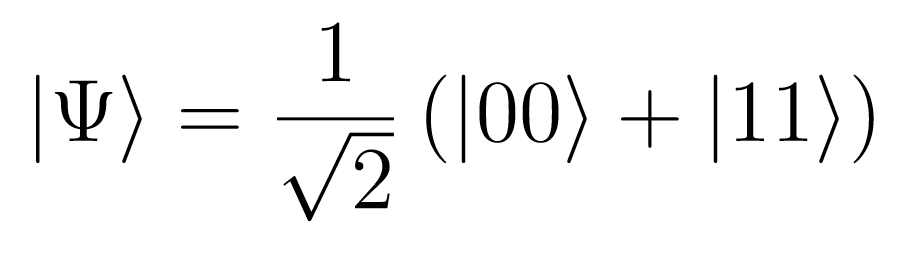

If we pick any of the two qubits to measure, we would obtain outcome $|0>$ and $|1>$ with equal probability $(P=1/2)$; and the other qubit is guaranteed to be measured in the same state as the first one. This “correlation” between the two qubits are called quantum entanglement. 

Note: This is not to be confused with two correlated random bits each with equal probability of being observed $|0> or |1>$. 

1. What happens to the overall state if I measure the first qubit in the up-down basis (|0>, |1> direction) and get a |0>?

# **Measurement**

## **up-down basis (|0>, |1> direction)**

We have $|ψ⟩=\frac{1}{√2}|00⟩+\frac{1}{√2}|11⟩$ and so if the first qubit is in the state $|0⟩$ after measurement then this means that the state $|ψ⟩$ has collapsed onto the eigenvector $|ψ'⟩ = |00⟩$. Similarly, if the read out indicates that the first qubit is a $|1⟩$ then $|ψ'⟩$ would have been $|11⟩$.

## Extra work

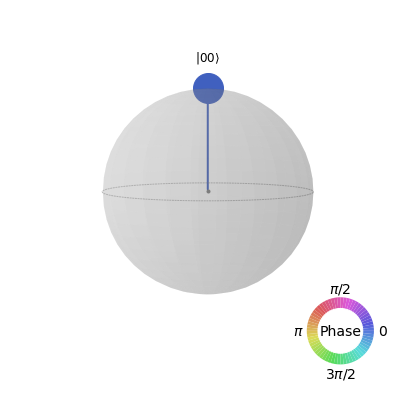

In [ ]:
import qiskit
from qiskit.quantum_info import Statevector # the state vector of the required qubits is generated
from qiskit.visualization import plot_state_qsphere # plot the qubits in a qsphere

sv = Statevector.from_label('00') # show the input state 00
plot_state_qsphere(sv.data)  #plot the previous state

In [ ]:
qc = qiskit.QuantumCircuit(2,2)# generate the circuit's bell state 
qc.h(0)
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c_0: ══════════
               
c_1: ══════════

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


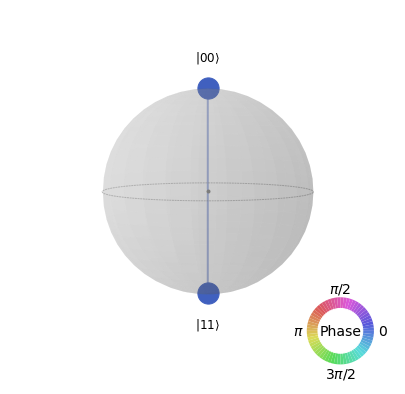

In [ ]:
new_sv = sv.evolve(qc) # show the output vector state 
print(new_sv)
plot_state_qsphere(new_sv.data) # show the plot of  the output qubits

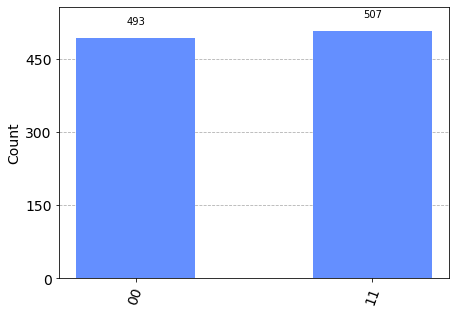

In [ ]:
counts = new_sv.sample_counts(shots=1000) # simulate  with 1000 iterations

from qiskit.visualization import plot_histogram
plot_histogram(counts) # plot the output istogram

In [ ]:
from qiskit import IBMQ

In [ ]:
IBMQ.save_account('put_your_access_token')

In [ ]:
IBMQ.load_account() # load the token

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
provider = qiskit.IBMQ.get_provider('ibm-q') # select the provider
backend = provider.get_backend('ibmq_belem') # select the name of the quatum computer to use
print("real device:",backend.name())

real device: ibmq_belem


In [ ]:
qc.measure([0,1],[0,1]) # we apply the measurement 
job = qiskit.execute( qc, backend)
result = job.result()
counts =result.get_counts(qc) # obtain he output values
print("counts: ", counts ) # show the result

counts:  {'00': 1983, '01': 97, '10': 87, '11': 1833}


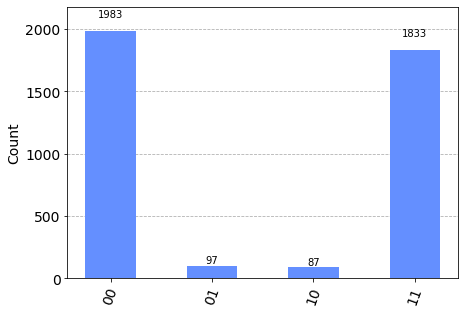

In [ ]:
qiskit.visualization.plot_histogram(counts) # plot the histogram 

## **left-right basis ( |+>, |-> direction)**

Now, what happens if I measure the first qubit in the |+>, |-> basis and get a |+>?

**Steps**

i. This is the state after measuring the first qubit in the left-right basis: $|0>⊗|0>$

We need first to rewrite the current state in terms of the eigenstates of the operator in question.

$|0⟩=\frac{1}{√2}(|+⟩+|−⟩)$

$|1⟩=\frac{1}{√2}(|+⟩−|−⟩)$

Superposition :

$|ψ⟩=\frac{1}{√2}(\frac{1}{2}(|+⟩+|−⟩)(|+⟩−|−⟩)+\frac{1}{2}(|+⟩−|−⟩)(|+⟩+|−⟩))$

   $=\frac{1}{2√2}(2|++⟩−2|−−⟩)$

   $=\frac{1}{√2}(|++⟩−|−−⟩)$

ii. Can you figure out what $|0>$ is? 

Answer: 

$\frac{(|+>+|->)}{sqrt(2)}$

iii. Now, expand out |0>⊗|0> by substituting what we got in part ii. 

Answer:  


$\frac{(|+⟩ ⊗ |+⟩ + |+⟩ ⊗ |-⟩ + |-⟩ ⊗ |+⟩ + |-⟩ ⊗ |-⟩)}{2}$

Explanation:


$|ψ⟩=\frac{|0⟩ ⊗ |0⟩}{√2}$

   $=\frac{|+⟩+|−⟩}{√2} ⊗ \frac{|+⟩+|−⟩}{√2}$

   $=\frac{(|+⟩+|+⟩) + (|+⟩+|−⟩) + (|-⟩+|−⟩) + (|-⟩+|−⟩)}{√2}$

   $=\frac{(|++⟩) + (|+−⟩) + (|-−⟩) + (|-−⟩)}{√2}$

iv. Now, if you measure and get a |+> for the first qubit, what is the state of the second qubit? 

Answer: 

$\frac{(|+>+|->)}{sqrt(2)}$

v. Are they still entangled in the |+> basis then?

This state still looks entangled in the $X-basis$ as well as in the $Z-basis$ (Not a tensor product), which is general property that entanglement cannot disappear just by rotating between bases. 

# **Challenge**

## **Einstein Podolsky Rosen - EPR pairs**

Known as Bell states or EPR pairs, are specefic quantum states of two qubits that represent the simplest (and maximal) examples of quantum entanglement.

We dealt with the state  $\frac{(|0>⊗|0>+|1>⊗|1>)}{sqrt(2)}$ after we already measured the first qubit. What if instead we took the state  $\frac{(|0>⊗|0>-|1>⊗|1>)}{sqrt(2)}$ and measured in the |+>, |-> basis? Do we still have entanglement? 

Yes, we'll do.

This is, in fact, a very special state known as the EPR pair that we will keep coming back to!


### **Demo**

We proceed just like we did in the previous example:

$|ψ⟩=\frac{|0⟩ ⊗ |0⟩}{√2}$

   $=\frac{|+⟩+|−⟩}{√2} ⊗ \frac{|+⟩+|−⟩}{√2}$

   $=\frac{(|+⟩+|+⟩) + (|+⟩+|−⟩) + (|-⟩+|−⟩) + (|-⟩+|−⟩)}{√2}$

   $=\frac{(|++⟩) + (|+−⟩) + (|-−⟩) + (|-−⟩)}{√2}$

# **References**

https://quantumcomputing.stackexchange.com/questions/14651/what-is-the-result-of-measuring-sigma-x-on-the-state-01-rangle10-rangle

https://fullstackquantumcomputation.tech/blog/post-tutorial-1-Bell-state/

https://www.youtube.com/watch?v=7jMR-ey-cJc&feature=youtu.be

https://www.reddit.com/r/QuantumComputing/comments/8ifhm7/question_can_someone_explain_this_to_me_0_1_sqrt2/

https://quantumcomputing.stackexchange.com/questions/15824/preparing-bell-state-1-sqrt2-01-rangle-10-rangle-in-qiskit

https://www.researchgate.net/figure/Quantum-circuits-for-Bell-states-preparation-by-using-quantum-gates-It-transforms-a_fig10_341640818/amp

https://quantumcomputing.stackexchange.com/questions/28256/how-does-a-measurement-of-vec-v-cdot-vec-sigma-on-two-qubit-states-work

https://quantumcomputing.stackexchange.com/questions/6401/what-happens-if-i-measure-only-the-first-qubit-of-a-bell-state


# **Questions**

1. What happens if we measured the same state in the Y-basis?
2. How to measure only one qubit using qiskit code
3. How to visualise and interprete a bloch/qsphere